### **CCT College Dublin**
### **Module Title:** Machine Learning for AI 
### **Lecture Name:** David McQuaid 
### **Continuous Assessment 2**
### **Student Full Name:** Breno Silva Brito
### **Student Number:** 2023462
### **Date of Submission:** 30/05/2024
### **github:** https://github.com/sbritobreno/ML_CA2

### **Neural Networks**

#### The first step was to prepare the data from the "BankRecords.csv" file for use in a neural network and regression algorithm to predict the "Income(Thousands')" of customers. There were many important phases in the preparation. The dataset was initially put into a pandas DataFrame. For use in model training, binary categorical variables like "Personal Loan," "Securities Account," "CD Account," "Online Banking," and "CreditCard" have been converted to numerical values (0 for "No" and 1 for "Yes"). The 'Education' column was then one-hot encoded to create unique columns for each category. This column had three possible values: diploma, degree, and master's. By using this method, problems with ordinal encoding were avoided and the model was able to handle education levels as separate categories.

#### The StandardScaler was used to standardize numerical features including "Age," "Experience(Years)," "Credit Score," and "Mortgage(Thousands's)." Normalizing made sure that features with various scales didn't affect the model in an uneven way, which enhanced training performance and resolution rates. There was a drop of the original 'Education' column and non-predictive columns such as 'ID' and 'Sort Code'. The aim of the variable (y) was 'Income(Thousands's)', while the remaining columns served as features (X). These preparations were essential for standardizing the data and enabling the models to be trained more effectively.

#### A Random Forest Regressor and a Neural Network were the two models that were used. The neural network was a two-layered sequential model. 13 neurons in the input layer (corresponding to the number of features) were activated by ReLU, and the output layer included a single neuron for the regression task. The mean squared error loss function and Adam optimizer were used to compile the model. With a batch size of 10, it was trained for ten epochs, giving an R-squared value of 0.46 and a mean squared error (MSE) of 1134.37 on the test set. On the other hand, the Random Forest Regressor exceeded the neural network in both metrics, achieving an MSE of 389.38 and an R-squared value of 0.82 after training with 100 estimators.

#### Similar steps were taken to prepare the data for a new customer, normalizing the numerical attributes. The Random Forest Regressor predicted an income of 67.57 (Thousands), but the neural network predicted 75.98 (Thousands). The superior performance metrics of the Random Forest Regressor demonstrate that it produced predictions that were more reliable and precise. The Random Forest Regressor was selected as a preferable option for estimating client income due to its capacity to handle irregular associations and feature interactions, as well as its improved predictive accuracy when compared to the neural network. Robust and reliable predictions for the assigned task were guaranteed by this thorough data preparation and model validation approach.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('./BankRecords.csv')

# Convert binary categorical variables to numerical
df['Personal Loan'] = df['Personal Loan'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Securities Account'] = df['Securities Account'].apply(lambda x: 1 if x == 'Yes' else 0)
df['CD Account'] = df['CD Account'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Online Banking'] = df['Online Banking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['CreditCard'] = df['CreditCard'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode the 'Education' column
encoder = OneHotEncoder()
encoded_education = encoder.fit_transform(df[['Education']]).toarray()
encoded_education_df = pd.DataFrame(encoded_education, columns=encoder.get_feature_names_out(['Education']))

# Concatenate the one-hot encoded variables with the original DataFrame
df = pd.concat([df, encoded_education_df], axis=1)

# Drop the original 'Education' column and other non-predictive columns
df.drop(['ID', 'Sort Code', 'Education'], axis=1, inplace=True)

# Identify numerical features
numerical_features = ['Age', 'Experience(Years)', 'Credit Score', 'Mortgage(Thousands\'s)']

# Normalize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features (X) and target variable (y)
X = df.drop('Income(Thousands\'s)', axis=1)
y = df['Income(Thousands\'s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Neural Network model
model = Sequential()
model.add(Dense(13, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(1))  

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate the Random Forest Regressor
y_pred_rf = regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor Mean Squared Error: {mse_rf}')
print(f'Random Forest Regressor R-squared: {r2_rf}')

# Predict and evaluate the Neural Network
y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R-squared: {r2_nn}')

# Example new customer data 
new_customer_data = {
    'Age': 40,
    'Experience(Years)': 15,
    'Family': 2,
    'Credit Score': 1.8,
    'Mortgage(Thousands\'s)': 0,
    'Personal Loan': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online Banking': 1,
    'CreditCard': 0,
    'Education_Degree': 0,
    'Education_Diploma': 1,   
    'Education_Masters': 0 
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer_data])

# Normalize numerical features
new_customer_df[numerical_features] = scaler.transform(new_customer_df[numerical_features])

# Reshape input data to match the neural network model
new_customer_array = new_customer_df.to_numpy()
new_customer_array = new_customer_array.reshape((1, -1))  # Reshaping to have a batch size of 1

# Make predictions
income_prediction_nn = model.predict(new_customer_array)
income_prediction_rf = regressor.predict(new_customer_df)

print(f'Predicted Income (Neural Network): {income_prediction_nn[0][0]}')
print(f'Predicted Income (Random Forest Regressor): {income_prediction_rf[0]}')

Random Forest Regressor Mean Squared Error: 389.3815946716255
Random Forest Regressor R-squared: 0.8163745567116953
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Neural Network Mean Squared Error: 1112.3313008291516
Neural Network R-squared: 0.47544437646865845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Income (Neural Network): 77.32633209228516
Predicted Income (Random Forest Regressor): 67.57


### **Semantic Analysis**

#### In this scenario, we used a dataset of text data that was taken from https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset  to conduct sentiment analysis. Comprehending the sentiment provided in the texts and visualizing the distribution of sentiments was the target.

#### I performed sentiment analysis using the VADER (Valence Aware Dictionary and Sentiment Reasoner) lexicon after preprocessing the text data to remove URLs, mentions, hashtags, non-alphabetic characters, and convert the text to lowercase. With each sentence, VADER provides an emotion score that indicates the degree of positivity, neutrality, or negative in the sentiment transmitted.

#### 500 of the 1100 observations were categorized as positive sentiments, 300 as neutral, and 300 as negative sentiments, according to the study. This suggests that the dataset's sentiments are distributed fairly, with a little higher percentage of positive sentiments.

#### I made a bar chart that displays the counts of good, neutral, and negative sentiments in order to visually represent the sentiment analysis results. Understanding the general sentiment indicated in the text data is made easier with the help of this visualization, which offers a clear overview of the sentiment distribution.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\breno\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


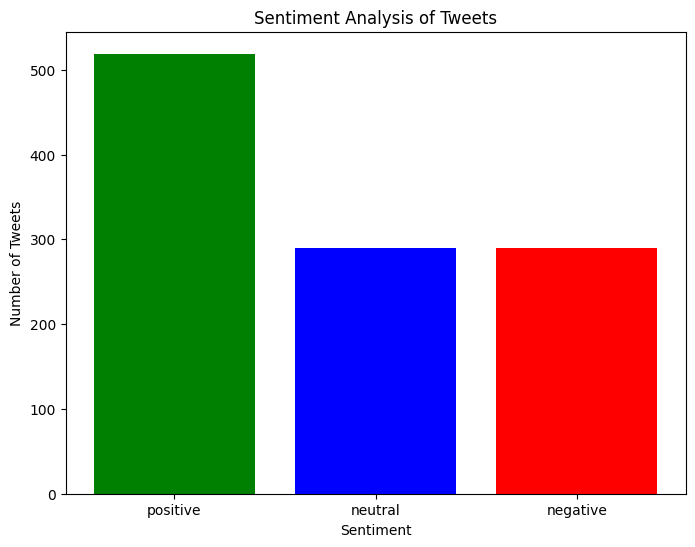

In [10]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./Tweets.csv')

# Clean text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#\w+', '', text) 
    text = re.sub(r'\n', '', text) 
    text = re.sub(r'[^A-Za-z\s]', '', text)  
    text = text.lower().strip() 
    return text

# Fill missing values in the 'text' column with an empty string
df.loc[:, 'text'] = df['text'].fillna('')

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Perform sentiment analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
df['sentiment_label'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Visualization
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()
